In [1]:
# coding: utf-8
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import math
from matplotlib.colors import LogNorm

plt.style.use('seaborn-deep')

In [3]:
# Open file
DV_dir_name = "/home/newhouse/public/Analysis/HNL/VH4b/run/testRun_311660/"
data_tree = uproot.open(DV_dir_name+"/"+"data-tree/"+"files.root")
# print(data_tree.keys())
# print(data_tree.values())
# Load trees
outTree = data_tree.get('outTree')
cutflow = data_tree.get('cutflow')
cutflow_weighted = data_tree.get('cutflow_weighted')
MetaData_EventCount = data_tree.get('MetaData_EventCount')

# Open file
HNL_dir_name = "/home/newhouse/public/Analysis/HNL/R21_ntupleMaker_HNLAnalysis/run/"
HNL_NTuple_VSILep = uproot.open(HNL_dir_name+"/"+"HNL_NTuple_VSILep.root")
# print(HNL_NTuple_VSILep.keys())
# print(HNL_NTuple_VSILep.values())
# Load trees
HNLVectorTree = HNL_NTuple_VSILep.get('HNLVectorTree')
CutFlow = HNL_NTuple_VSILep.get('CutFlow')

FileNotFoundError: [Errno 2] No such file or directory: '/home/newhouse/public/Analysis/HNL/VH4b/run/testRun_311660//data-tree/files.root'

In [233]:
# Print info
print(outTree)
print(outTree.name)
print(outTree.title)
print(outTree.numentries)
print(outTree.pandas)
# print(outTree.keys())
outTree.show()

<TTree b'outTree' at 0x7f79a6187b00>
b'outTree'
b'outTree'
4553
runNumber                  (no streamer)              asdtype('>i4')
eventNumber                (no streamer)              asdtype('>i8')
lumiBlock                  (no streamer)              asdtype('>i4')
coreFlags                  (no streamer)              asdtype('>u4')
bcid                       (no streamer)              asdtype('>i4')
mcEventNumber              (no streamer)              asdtype('>i4')
mcChannelNumber            (no streamer)              asdtype('>i4')
mcEventWeight              (no streamer)              asdtype('>f4')
NPV                        (no streamer)              asdtype('>i4')
actualInteractionsPerCrossing
                           (no streamer)              asdtype('>f4')
averageInteractionsPerCrossing
                           (no streamer)              asdtype('>f4')
weight_pileup              (no streamer)              asdtype('>f4')
correctedAverageMu         (no streamer)       

In [236]:
df_jet_DV = outTree.pandas.df(["jet_*"])

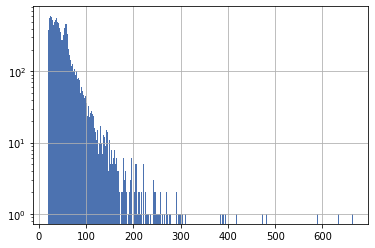

In [244]:
df_jet_DV.jet_E.hist(bins=300, log=True)

In [ ]:
df_mu = HNLVectorTree.pandas.df(["Mu*Vec"])

In [194]:
df_mu["MuPtVec"]

entry  subentry
0      0           27.565303
       1           46.773055
1      0            5.116404
       1            8.280002
       2            2.059710
                     ...    
4999   0           30.498809
       1           19.928738
       2           17.909941
       3            9.173894
       4           80.445352
Name: MuPtVec, Length: 47321, dtype: float64

In [224]:
# Do Not Erase
# This snippet selects the 0th subentry for every entry in the dataframe
df_mu.loc[ (slice(None),[0]) , : ]

,,MuPtVec,MuEtaVec,MuPhiVec,MuPxVec,MuPyVec,MuPzVec,MuPtC30Vec,Mud0Vec,MuChargeVec,MuPassPmuFilterCutsVec,MuPassDmuFilterCutsVec,MuIDLevelVec,MuTypeVec,MuMSInnerMatchChi2Vec,MuMSInnerMatchDOFVec,MuTrackIsLRTVec
entry,subentry,,,,,,,,,,,,,,,,
0,0,27.565303,2.444817,2.006696,-11.638796,24.987684,157.696903,0.000000,0.009448,1.0,False,False,2,0,0.882492,5,False
1,0,5.116404,-0.153222,0.757816,3.716243,3.516692,-0.787017,2.080948,-2.562356,1.0,False,True,2,0,0.104142,5,False
2,0,12.026337,2.465437,2.190938,-6.989109,9.786988,70.255764,0.000000,-0.018612,1.0,False,False,2,0,1.421475,5,False
3,0,6.766832,0.940179,-2.807503,-6.392687,-2.218910,7.341612,0.000000,-174.758575,1.0,False,False,-1,0,0.000000,0,True
4,0,2.932946,-0.309010,0.582367,2.449489,1.613127,-0.920801,1.253707,0.055302,-1.0,False,False,0,0,0.000000,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,7.833568,2.330002,0.086982,7.803953,0.680519,39.875464,0.000000,-0.118553,-1.0,False,True,2,0,0.178115,5,False
4996,0,27.149934,1.899988,0.678676,21.133638,17.043716,88.729276,0.000000,17.796495,-1.0,False,False,-1,3,0.000000,0,True
4997,0,29.446912,-0.337795,0.656161,23.331963,17.964969,-10.137278,0.000000,0.040850,1.0,True,False,2,0,0.830257,5,False


In [148]:
HNLVectorTree.show()

EventNumber                (no streamer)              asdtype('>i4')
RunNumber                  (no streamer)              asdtype('>i4')
LumiBlock                  (no streamer)              asdtype('>i4')
TriggerPass_HLT_mu26_ivarmedium
                           (no streamer)              asdtype('bool')
TriggerPass_HLT_mu22_mu8noL1
                           (no streamer)              asdtype('bool')
TriggerPass_HLT_3mu6_msonly
                           (no streamer)              asdtype('bool')
TriggerPass_HLT_2mu14,     (no streamer)              asdtype('bool')
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1TAU60
                           (no streamer)              asdtype('bool')
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1TAU100
                           (no streamer)              asdtype('bool')
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1LLP_NOMATCH
                           (no streamer)              asdtype('bool')
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1LLP_RO
              

In [ ]:
df = HNLVectorTree.pandas.df(flatten=False)

In [ ]:
for column in df.columns:
    print(column)
    

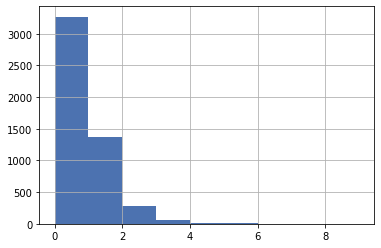

In [137]:
df['DispVrtNumberOfAssociatedTracksVec'].apply(lambda x: len(x)).hist(bins=[0,1,2,3,4,5,6,7,8,9])


In [18]:
outTree_arrays = outTree.arrays()
outTree_arrays = { key.decode(): val for key, val in outTree_arrays.items() }


In [19]:
HNLVectorTree_arrays = HNLVectorTree.arrays()
HNLVectorTree_arrays = { key.decode(): val for key, val in HNLVectorTree_arrays.items() }


In [ ]:
for key in outTree.keys():
    print(key)
    

In [73]:
for key in HNLVectorTree_arrays.keys():
    print(key)
    

EventNumber
RunNumber
LumiBlock
TriggerPass_HLT_mu26_ivarmedium
TriggerPass_HLT_mu22_mu8noL1
TriggerPass_HLT_3mu6_msonly
TriggerPass_HLT_2mu14,
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1TAU60
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1TAU100
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1LLP_NOMATCH
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1LLP_RO
TriggerPass_HLT_mu6_dRl1_mu20_msonly_iloosems_mu6noL1_dRl1_msonly
TriggerPass_HLT_j30_muvtx
TriggerPass_HLT_j30_muvtx_noiso
FilterPass
MET
METPhi
SumET
NumPromptMuons
MuPtVec
MuEtaVec
MuPhiVec
MuPxVec
MuPyVec
MuPzVec
MuPtC30Vec
Mud0Vec
MuChargeVec
MuPassPmuFilterCutsVec
MuPassDmuFilterCutsVec
MuIDLevelVec
MuTypeVec
MuMSInnerMatchChi2Vec
MuMSInnerMatchDOFVec
MuTrackIsLRTVec
NumDisplacedVertices
DispVrtMassVec
DispVrtXVec
DispVrtYVec
DispVrtZVec
DispVrtPxVec
DispVrtPyVec
DispVrtPzVec
DispVrtTruthMatchingBarcodeVec
DispVrtNumberOfAssociatedTracksVec
DispVrtTrackPtVec
DispVrtTrackEtaVec
DispVrtTrackPhiVec
DispVrtTrackPxVec
DispVrtTrackPyVec
DispVrtTrac

In [71]:
HNL_var = 'DispVrtNumberOfTracksVec'
DV_var = 'secVtx_distFromPV'

print("First 10 entries")
print("HNL_var:", HNL_var, " --- ", "DV_var:", DV_var )

for i in range(100): 
    print("HNL", HNLVectorTree_arrays[HNL_var][i])
    print("DV", outTree_arrays[DV_var][i])
    try: print("difference:", outTree_arrays[DV_var][i] - HNLVectorTree_arrays[HNL_var][i] )
    except: pass
    print()



First 10 entries
HNL_var: DispVrtNumberOfTracksVec  ---  DV_var: secVtx_distFromPV


KeyError: 'DispVrtNumberOfTracksVec'

In [3]:
# df = outTree.pandas.df(flatten=False)

In [5]:
for column in df.columns:
    print(column)

runNumber
eventNumber
lumiBlock
coreFlags
bcid
mcEventNumber
mcChannelNumber
mcEventWeight
NPV
actualInteractionsPerCrossing
averageInteractionsPerCrossing
weight_pileup
correctedAverageMu
correctedAndScaledAverageMu
correctedActualMu
correctedAndScaledActualMu
rand_run_nr
rand_lumiblock_nr
pdgId1
pdgId2
pdfId1
pdfId2
x1
x2
q
xf1
xf2
mjj
m3j
mnj
LLP1_beta
LLP1_gamma
LLP1_R_coord
LLP1_X_coord
LLP1_Y_coord
LLP1_Z_coord
LLP1_lifetime_dil
LLP1_lifetime_prop
LLP1_Pt
LLP1_Eta
LLP1_Phi
LLP1_Mass
LLP2_beta
LLP2_gamma
LLP2_R_coord
LLP2_X_coord
LLP2_Y_coord
LLP2_Z_coord
LLP2_lifetime_dil
LLP2_lifetime_prop
LLP2_Pt
LLP2_Eta
LLP2_Phi
LLP2_Mass
V_Child
V_Child_Pt
V_Child_Eta
V_Child_Phi
V_Child_M
V_Id
V_Pt
V_Eta
V_Phi
V_Mass
Neutrino_Id
Neutrino_Pt
Neutrino_Eta
Neutrino_Phi
Neutrino_Mass
Track_Met
H_Pt
H_Eta
H_Phi
H_Mass
B_Index
B_Pt
B_Eta
B_Phi
B_Mass
B_Matched
B_Nearest
passesFilter
passesElecFilter
passesMuonFilter
Met
Met_Phi
Met_Sumet
Lep_JetMinCHF_DeltaPhi
Lep_SumLeadingJets_DeltaPhi
Vec_JetM

In [90]:
# df.NPV.hist()
# df.actualInteractionsPerCrossing.hist()
# df.nsecVtx.unique()

,runNumber,eventNumber,lumiBlock,coreFlags,bcid,mcEventNumber,mcChannelNumber,mcEventWeight,NPV,actualInteractionsPerCrossing,...,truthVtx_outP_recoID,truthVtx_outP_recoIsSelected,truthVtx_outP_recoIsAssociated,truthVtx_outP_isStable,truthVtx_outP_isInteracting,truthVtx_outP_isReconstructible,truthVtx_linkedRecoVtx_ID,truthVtx_linkedRecoVtx_score,truthVtx_maxlinkedRecoVtx_ID,truthVtx_maxlinkedRecoVtx_score
entry,,,,,,,,,,,,,,,,,,,,,
0,284500,853,11,0,2990,853,311660,1.0,5,10.49,...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,284500,1244,22,0,1871,1244,311660,1.0,16,21.50,...,"[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0...","[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0...","[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0...","[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0...","[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0...","[[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,284500,715,34,0,609,715,311660,1.0,12,33.50,...,"[[0, 0, 0, 0, 0], [0, 0, 0, 0], [0], [0], [0, ...","[[0, 0, 0, 0, 0], [0, 0, 0, 0], [0], [0], [0, ...","[[0, 0, 0, 0, 0], [0, 0, 0, 0], [0], [0], [0, ...","[[0, 0, 0, 0, 0], [0, 0, 0, 0], [0], [0], [0, ...","[[0, 0, 0, 0, 0], [0, 0, 0, 0], [0], [0], [0, ...","[[1, 1, 1, 1, 1], [1, 1, 1, 1], [1], [1], [1, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,284500,1725,26,0,1155,1725,311660,1.0,16,25.50,...,"[[0, 0, 0], [0, 0], [0], [0], [0, 0], [0], [0]...","[[0, 0, 0], [0, 0], [0], [0], [0, 0], [0], [0]...","[[0, 0, 0], [0, 0], [0], [0], [0, 0], [0], [0]...","[[0, 0, 0], [0, 0], [0], [0], [0, 0], [0], [0]...","[[0, 0, 0], [0, 0], [0], [0], [0, 0], [0], [0]...","[[1, 1, 1], [1, 1], [1], [1], [1, 1], [1], [1]...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,284500,1450,35,0,2586,1450,311660,1.0,17,34.50,...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4548,284500,4710,30,0,258,4710,311660,1.0,18,29.50,...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4549,284500,4761,16,0,3181,4761,311660,1.

In [ ]:
print(HNLVectorTree.name)
print(HNLVectorTree.title)
print(HNLVectorTree.numentries)
print(HNLVectorTree.pandas)
# print(HNLVectorTree.keys())
entry_arrays = HNLVectorTree.arrays()

In [40]:
entry_arrays[b'EventNumber']
for key in HNLVectorTree.keys():
    print(key.decode('UTF-8'))


EventNumber
RunNumber
LumiBlock
TriggerPass_HLT_mu26_ivarmedium
TriggerPass_HLT_mu22_mu8noL1
TriggerPass_HLT_3mu6_msonly
TriggerPass_HLT_2mu14,
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1TAU60
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1TAU100
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1LLP_NOMATCH
TriggerPass_HLT_j30_jes_cleanLLP_PS_llp_L1LLP_RO
TriggerPass_HLT_mu6_dRl1_mu20_msonly_iloosems_mu6noL1_dRl1_msonly
TriggerPass_HLT_j30_muvtx
TriggerPass_HLT_j30_muvtx_noiso
FilterPass
MET
METPhi
SumET
NumPromptMuons
MuPtVec
MuEtaVec
MuPhiVec
MuPxVec
MuPyVec
MuPzVec
MuPtC30Vec
Mud0Vec
MuChargeVec
MuPassPmuFilterCutsVec
MuPassDmuFilterCutsVec
MuIDLevelVec
MuTypeVec
MuMSInnerMatchChi2Vec
MuMSInnerMatchDOFVec
MuTrackIsLRTVec
NumDisplacedVertices
DispVrtMassVec
DispVrtXVec
DispVrtYVec
DispVrtZVec
DispVrtPxVec
DispVrtPyVec
DispVrtPzVec
DispVrtTruthMatchingBarcodeVec
DispVrtNumberOfTracksVec
DispVrtNumberOfAssociatedTracksVec
DispVrtTrackPtVec
DispVrtTrackEtaVec
DispVrtTrackPhiVec
DispVrtTrackPxVec
Disp

In [13]:
HNLVectorTree

<TTree b'HNLVectorTree' at 0x7f89e577a5f8>

In [6]:
files = uproot.open("/data/hnl/forRobin/mc16eONLY.311621.promptmuHNL_5G_10mm_DAOD_RPVLL_newRECO.root")

In [9]:
outTree = files['outTree']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd5ed93b10>]],
      dtype=object)

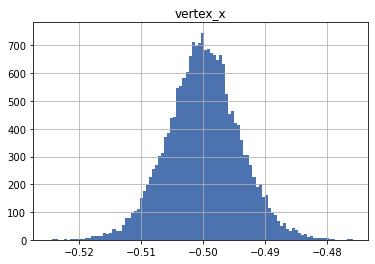

In [15]:
outTree.pandas.df(['vertex_x']).hist(bins=100)

In [16]:
import ROOT

Welcome to JupyROOT 6.20/04


In [17]:
my_file = ROOT.TFile("/data/hnl/forRobin/mc16eONLY.311621.promptmuHNL_5G_10mm_DAOD_RPVLL_newRECO.root")

In [19]:
outTreeRoot= my_file.Get("outTree")

In [23]:
c = ROOT.TCanvas()
outTreeRoot.Draw("vertex_x")

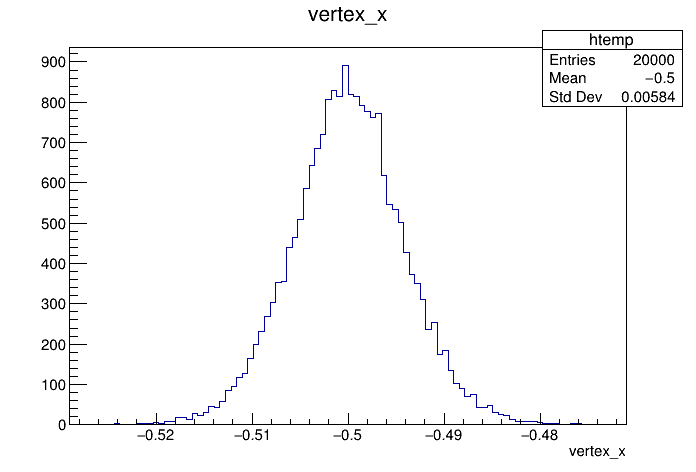

In [24]:
c.Draw()

In [3]:
f = uproot.open('/data/hnl/KShort/ntuples/dijet_mc16e/JZ12/0/submitDir/data-tree/files.root')

In [4]:
f.keys()

[b'outTree;1', b'cutflow;1', b'MetaData_EventCount;1']

<AxesSubplot:>

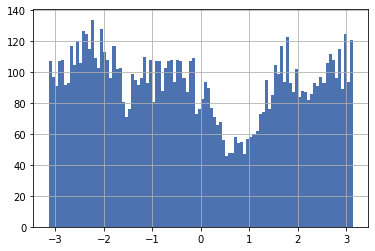

In [7]:
f['outTree'].pandas.df('secVtx_VSI_Leptons_phi').secVtx_VSI_Leptons_phi.hist(bins=100)